# **Import relevant dependancies**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishanbandara","key":"c94981dc90e2d82e578b40521e41e61b"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
ls ~/.kaggle/

kaggle.json


In [ ]:
! kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd

Dataset URL: https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd
License(s): unknown
100% 2.57G/2.58G [00:21<00:00, 147MB/s]
100% 2.58G/2.58G [00:21<00:00, 126MB/s]


In [ ]:
!unzip driver-drowsiness-dataset-ddd.zip

Streaming output truncated to the last 5000 lines.
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0082.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0083.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0084.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0085.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0086.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0087.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0088.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0089.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0090.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0091.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0092.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0093.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0094.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0095.png

In [ ]:
!pip install tensorflow

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
#from collections import counter

In [ ]:
tf.random.set_seed(3)

In [ ]:
!pip install split-folders

In [ ]:
path = "/content/train_data"
os.makedirs(path,exist_ok=True)

# **Split in to train test and validation folders**

In [ ]:
import splitfolders

data = "/content/Driver Drowsiness Dataset (DDD)"
output_dir = "/content/train_data"
splitfolders.ratio(data,output = output_dir,seed=1337,ratio=(0.8,0.15,0.05))

Copying files: 41793 files [00:07, 5543.91 files/s]


# **Reading the data**

In [ ]:
train_dir = '/content/train_data/train'
test_dir = '/content/train_data/test'
val_dir = '/content/train_data/val'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_batch = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary',
    shuffle = True
)

Found 33434 images belonging to 2 classes.


In [ ]:
test_batch = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary',
    shuffle = True
)

Found 2091 images belonging to 2 classes.


In [ ]:
val_batch = val_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary',
    shuffle = True
)

Found 6268 images belonging to 2 classes.


In [ ]:
from collections import Counter

train_class_indices = train_batch.class_indices
test_class_indices = test_batch.class_indices
val_class_indices = val_batch.class_indices

train_class_labels = train_batch.classes
test_class_labels = test_batch.classes
val_class_labels = val_batch.classes

train_class_counts = Counter(train_class_labels)
test_class_counts = Counter(test_class_labels)
val_class_counts = Counter(val_class_labels)

print("Class names for train:\n",train_class_indices)
print("Class Counts for train:\n",train_class_counts)
print(end="\n")

print("Class names for test:\n",test_class_indices)
print("Class Counts for test:\n",test_class_counts)
print(end="\n")

print("Class names for validation:\n",val_class_indices)
print("Class Counts for validation:\n",val_class_counts)
print(end="\n")

Class names for train:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for train:
 Counter({0: 17878, 1: 15556})

Class names for test:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for test:
 Counter({0: 1118, 1: 973})

Class names for validation:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for validation:
 Counter({0: 3352, 1: 2916})



Pixels of the image after normalization: 

[[[0.64705884 0.5647059  0.5137255 ]
  [0.41176474 0.32941177 0.2784314 ]
  [0.20392159 0.12941177 0.07843138]
  ...
  [0.9568628  0.854902   0.7725491 ]
  [1.         0.91372555 0.82745105]
  [1.         0.9058824  0.8196079 ]]

 [[0.5176471  0.43529415 0.3803922 ]
  [0.31764707 0.23137257 0.1764706 ]
  [0.15686275 0.08235294 0.03137255]
  ...
  [0.9568628  0.85098046 0.7725491 ]
  [1.         0.909804   0.8196079 ]
  [1.         0.90196085 0.81568635]]

 [[0.3372549  0.25882354 0.21568629]
  [0.21568629 0.13725491 0.09411766]
  [0.12156864 0.0509804  0.01176471]
  ...
  [0.9568628  0.85098046 0.7725491 ]
  [1.         0.9058824  0.8196079 ]
  [1.         0.8980393  0.8078432 ]]

 ...

 [[0.14117648 0.08627451 0.32941177]
  [0.1254902  0.07058824 0.3137255 ]
  [0.09803922 0.04705883 0.29411766]
  ...
  [0.07843138 0.07843138 0.32941177]
  [0.08235294 0.08235294 0.3372549 ]
  [0.08627451 0.08627451 0.34509805]]

 [[0.1137255  0.0627451  0.3019

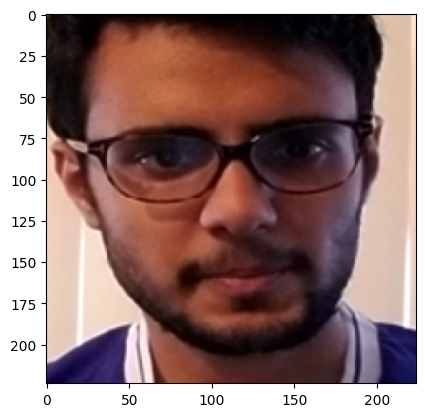

In [ ]:
images, pixels = next(train_batch)
print(f"Pixels of the image after normalization: \n\n{images[15]}")
plt.imshow(images[15])
plt.show()

In [ ]:
print(f"there are { images[0].ndim} channels")
print(f"image shape : {images[0].shape}")

there are 3 channels
image shape : (224, 224, 3)


In [ ]:
fig, axes = plt.subplots(8,4, figsize = (15,30))
class_indices = train_batch.class_indices

for i in range(8):
    images, labels = next(train_batch)
    for j in range(4):

        ax = axes[i,j]
        ax.imshow(images[j])
        ax.axis('off')
        label = int(labels[j])
        label_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        ax.set_title(f'{label_name} ({label})')

plt.tight_layout()
plt.show()

# **Load the MobileNet V2**

In [ ]:
image_size = (224,224)
base_model = MobileNetV2(
    weights = 'imagenet',
    include_top = False,
    input_shape = (image_size[0], image_size[1],3),
)

In [ ]:
type(base_model)

keras.src.engine.functional.Functional

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

# **Building a new sequential model**

In [ ]:
model = keras.Sequential()

In [ ]:
for layer in base_model.layers[:-25] :
    layer.trainable = False

# **Arichitecture of the neural network**

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input,outputs=predictions)

# **Summary of the model**

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

# **compile the model**

In [ ]:
model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Train the model**

In [ ]:
history = model.fit(
    train_batch,
    epochs = 2,
    validation_data = val_batch,
    batch_size = 32
)

Epoch 1/2
2090/2090 [==============================] - 773s 370ms/step - loss: 0.0150 - accuracy: 0.9967 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 2/2
2090/2090 [==============================] - 779s 373ms/step - loss: 0.0149 - accuracy: 0.9978 - val_loss: 0.0081 - val_accuracy: 0.9990


# **Save the model in h5 format**

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
! mkdir /content/saved_model

# **Save the model in tflite format**

In [ ]:
# Load the Keras model
model = tf.keras.models.load_model('/content/my_model.h5')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TensorFlow Lite format.")


Model successfully converted to TensorFlow Lite format.
